# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{CNN Network}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, classification_report

## $\color{deepskyblue}{\text{Preprocessing}}$
We start by loading the CIFAR-10 dataset, which consists of images and corresponding labels. To prepare the data for training a neural network, we normalize the pixel values by dividing them by 255. This normalization step ensures that the pixel values range between 0 and 1.

Next, we apply one-hot encoding to the labels. One-hot encoding converts the categorical labels into a binary matrix representation. Each label is represented as a row with all zeros except for the column corresponding to the class index, which is set to 1.

By performing these preprocessing steps, we ensure that the input data is properly scaled and the labels are in a suitable format for training a neural network on the CIFAR-10 dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


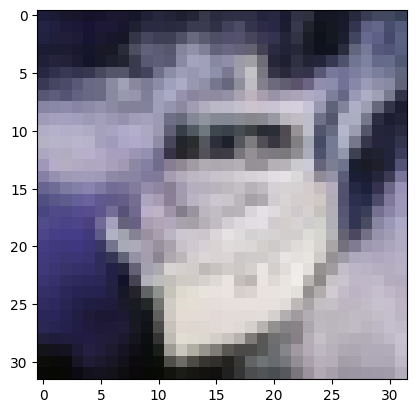

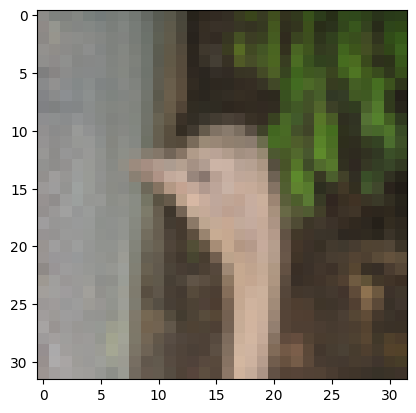

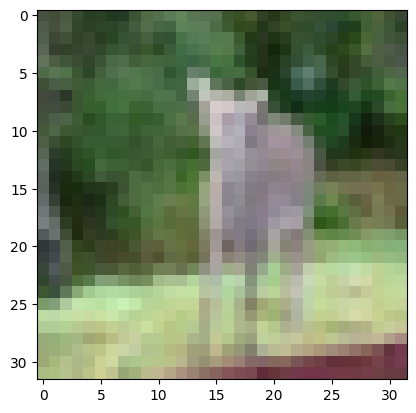

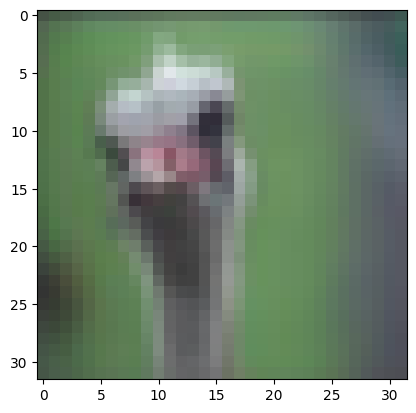

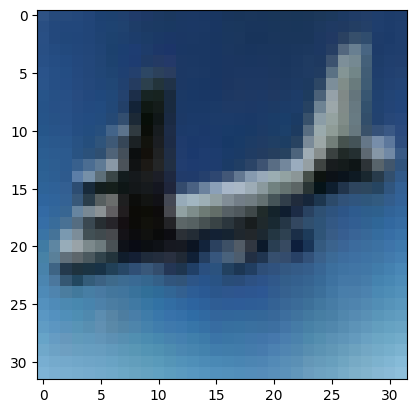

In [8]:
for _ in range(5):
  plt.imshow(x_train[np.random.randint(len(x_train))])
  plt.show()

## $\color{deepskyblue}{\text{SGD Optimizer}}$
### $\color{deepskyblue}{\text{Network Model}}$

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10 
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu",input_shape=x_train.shape[1:]),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                      

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 21s 8ms/step - loss: 2.1761 - accuracy: 0.1759 - val_loss: 2.0233 - val_accuracy: 0.2415
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.9992 - accuracy: 0.2510 - val_loss: 1.8778 - val_accuracy: 0.3232
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.8513 - accuracy: 0.3149 - val_loss: 1.7081 - val_accuracy: 0.3760
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7349 - accuracy: 0.3615 - val_loss: 1.6054 - val_accuracy: 0.4162
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6417 - accuracy: 0.3963 - val_loss: 1.5102 - val_accuracy: 0.4457
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5675 - accuracy: 0.4223 - val_loss: 1.5262 - val_accuracy: 0.4366
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5062 - accuracy: 0.4466 - val_loss: 1.3920 - val_accuracy

In [14]:
model.evaluate(x_test, y_test, verbose=0)

[0.7249510288238525, 0.7459999918937683]

### $\color{deepskyblue}{\text{Plot changing of the loss and accuracy}}$

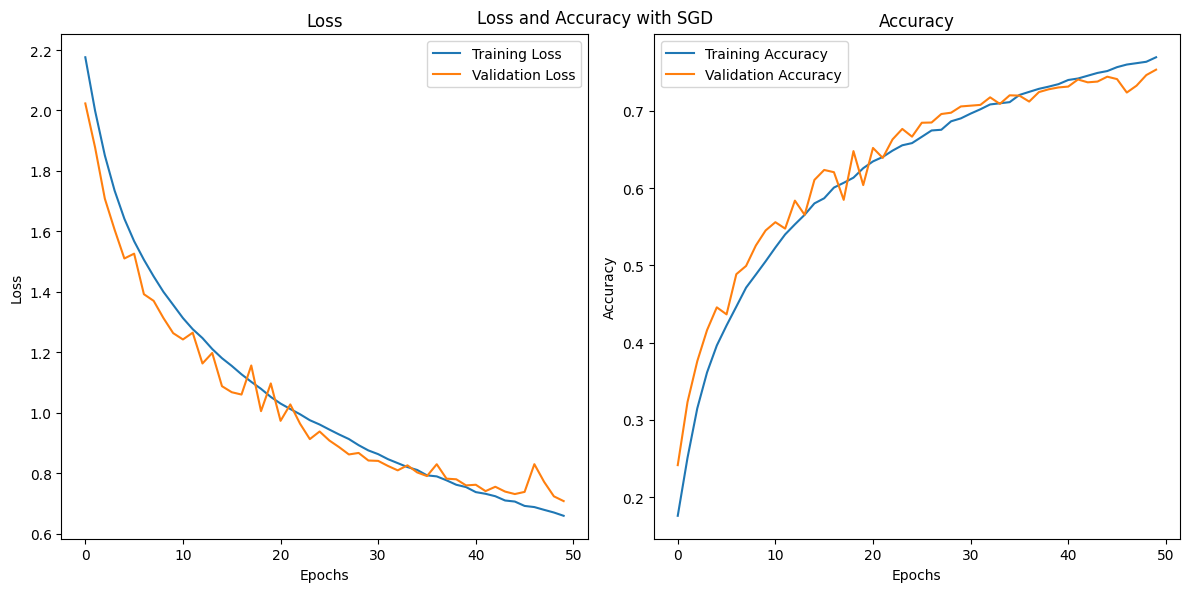

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training and validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the training and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.suptitle('Loss and Accuracy with SGD')
# Display the plot
plt.show()

In [24]:
y_train_pred = model.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_classes = np.argmax(y_train, axis=1)
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate classification report for training data
cr_train = classification_report(y_train_classes, y_train_pred_classes, target_names=target_names)

# Calculate classification report for test data
cr_test = classification_report(y_test_classes, y_test_pred_classes, target_names=target_names)

print("Classification Report (Training Data):\n", cr_train)

print("Classification Report (Test Data):\n", cr_test)

313/313 [==============================] - 1s 2ms/step
Classification Report (Training Data):
               precision    recall  f1-score   support

    airplane       0.87      0.81      0.84      5000
  automobile       0.92      0.92      0.92      5000
        bird       0.78      0.72      0.75      5000
         cat       0.63      0.68      0.65      5000
        deer       0.81      0.78      0.80      5000
         dog       0.71      0.74      0.73      5000
        frog       0.83      0.88      0.85      5000
       horse       0.85      0.84      0.84      5000
        ship       0.89      0.91      0.90      5000
       truck       0.90      0.90      0.90      5000

    accuracy                           0.82     50000
   macro avg       0.82      0.82      0.82     50000
weighted avg       0.82      0.82      0.82     50000

Classification Report (Test Data):
               precision    recall  f1-score   support

    airplane       0.81      0.73      0.76      1000
 

## $\color{deepskyblue}{\text{Adam Optimizer}}$
### $\color{deepskyblue}{\text{Network Model}}$

In [27]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu",input_shape=x_train.shape[1:]),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [28]:
history2 = model2.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 12s 7ms/step - loss: 1.7837 - accuracy: 0.3307 - val_loss: 1.4761 - val_accuracy: 0.4551
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4323 - accuracy: 0.4774 - val_loss: 1.2957 - val_accuracy: 0.5372
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2762 - accuracy: 0.5429 - val_loss: 1.1300 - val_accuracy: 0.5950
Epoch 4/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.1824 - accuracy: 0.5817 - val_loss: 1.0846 - val_accuracy: 0.6106
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1139 - accuracy: 0.6065 - val_loss: 1.0503 - val_accuracy: 0.6247
Epoch 6/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0626 - accuracy: 0.6258 - val_loss: 1.0037 - val_accuracy: 0.6444
Epoch 7/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.0329 - accuracy: 0.6370 - val_loss: 0.9550 - val_accuracy

In [29]:
model2.evaluate(x_test, y_test, verbose=0)

[0.82826828956604, 0.7251999974250793]

### $\color{deepskyblue}{\text{Plot changing of the loss and accuracy}}$

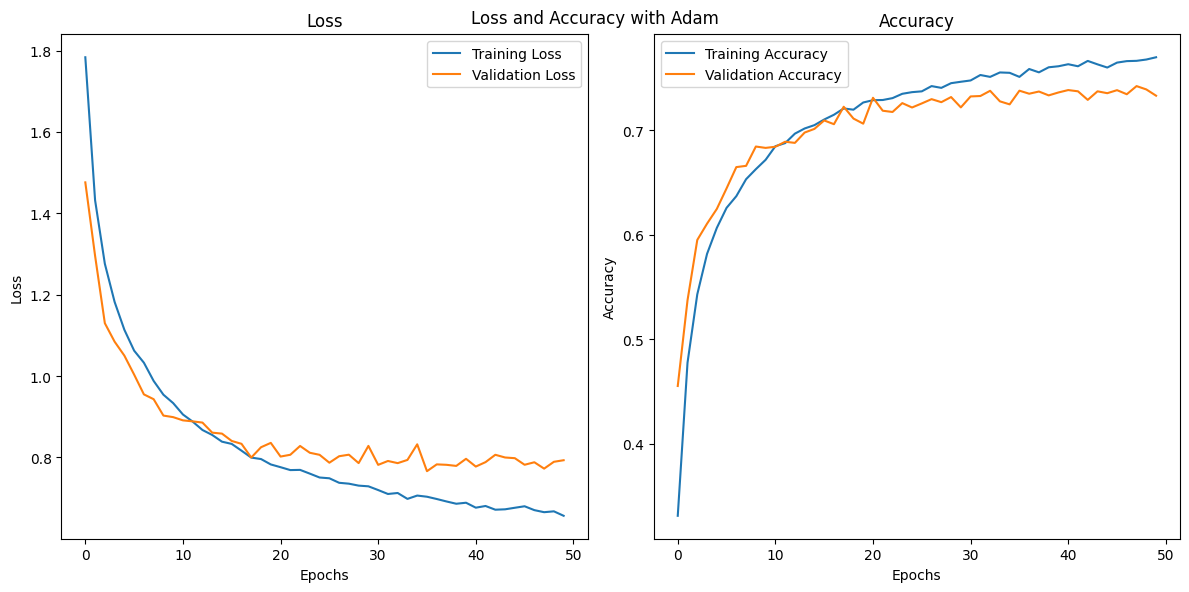

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training and validation loss
axs[0].plot(history2.history['loss'], label='Training Loss')
axs[0].plot(history2.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the training and validation accuracy
axs[1].plot(history2.history['accuracy'], label='Training Accuracy')
axs[1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.suptitle('Loss and Accuracy with Adam')
# Display the plot
plt.show()

In [31]:
y_train_pred = model2.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_classes = np.argmax(y_train, axis=1)
y_test_pred = model2.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate classification report for training data
cr_train = classification_report(y_train_classes, y_train_pred_classes, target_names=target_names)

# Calculate classification report for test data
cr_test = classification_report(y_test_classes, y_test_pred_classes, target_names=target_names)

print("Classification Report (Training Data):\n", cr_train)

print("Classification Report (Test Data):\n", cr_test)

313/313 [==============================] - 1s 2ms/step
Classification Report (Training Data):
               precision    recall  f1-score   support

    airplane       0.87      0.79      0.83      5000
  automobile       0.97      0.86      0.91      5000
        bird       0.81      0.72      0.77      5000
         cat       0.64      0.73      0.68      5000
        deer       0.75      0.85      0.80      5000
         dog       0.81      0.68      0.74      5000
        frog       0.79      0.91      0.84      5000
       horse       0.93      0.80      0.86      5000
        ship       0.79      0.95      0.86      5000
       truck       0.90      0.88      0.89      5000

    accuracy                           0.82     50000
   macro avg       0.83      0.82      0.82     50000
weighted avg       0.83      0.82      0.82     50000

Classification Report (Test Data):
               precision    recall  f1-score   support

    airplane       0.78      0.71      0.74      1000
 

## $\color{deepskyblue}{\text{RMSprop Optimizer Optimizer}}$
### $\color{deepskyblue}{\text{Network Model}}$

In [4]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu",input_shape=x_train.shape[1:]),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate = 0.0001),
              metrics=["accuracy"])

In [5]:
history3 = model3.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 22s 7ms/step - loss: 2.0455 - accuracy: 0.2275 - val_loss: 1.8021 - val_accuracy: 0.3310
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7749 - accuracy: 0.3391 - val_loss: 1.6294 - val_accuracy: 0.3997
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6166 - accuracy: 0.4013 - val_loss: 1.5565 - val_accuracy: 0.4326
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5155 - accuracy: 0.4431 - val_loss: 1.4174 - val_accuracy: 0.4811
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4316 - accuracy: 0.4769 - val_loss: 1.3220 - val_accuracy: 0.5216
Epoch 6/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3656 - accuracy: 0.5048 - val_loss: 1.2800 - val_accuracy: 0.5430
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3111 - accuracy: 0.5276 - val_loss: 1.2285 - val_accuracy

In [6]:
model3.evaluate(x_test, y_test, verbose=0)

[0.7984373569488525, 0.7315000295639038]

### $\color{deepskyblue}{\text{Plot changing of the loss and accuracy}}$

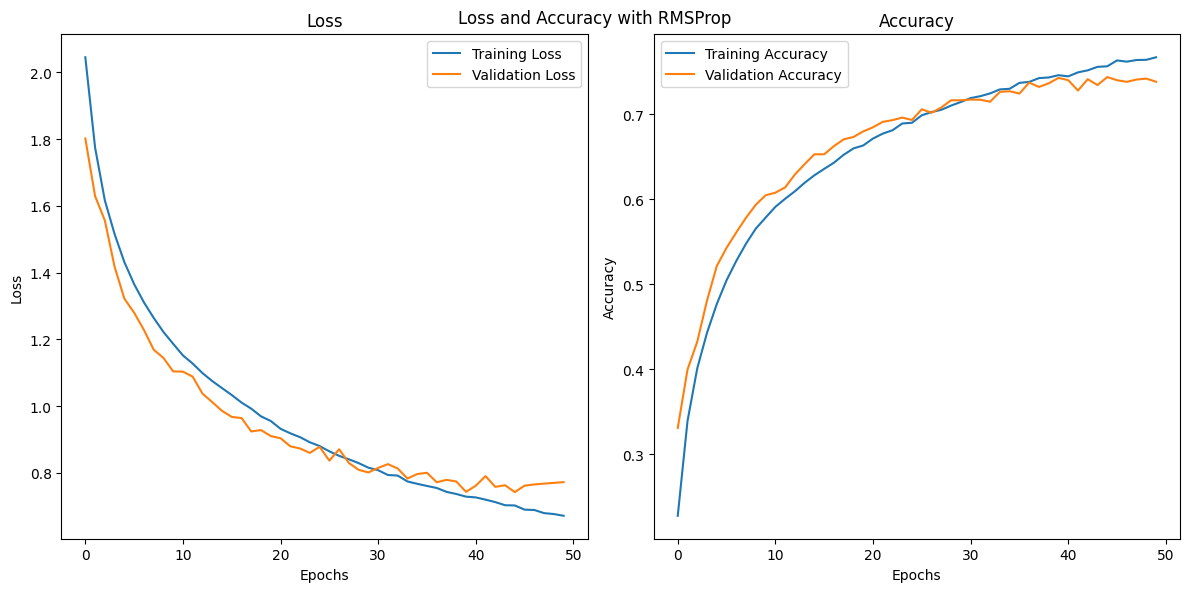

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training and validation loss
axs[0].plot(history3.history['loss'], label='Training Loss')
axs[0].plot(history3.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the training and validation accuracy
axs[1].plot(history3.history['accuracy'], label='Training Accuracy')
axs[1].plot(history3.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.suptitle('Loss and Accuracy with RMSProp')
# Display the plot
plt.show()

In [8]:
y_train_pred = model3.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_classes = np.argmax(y_train, axis=1)
y_test_pred = model3.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate classification report for training data
cr_train = classification_report(y_train_classes, y_train_pred_classes, target_names=target_names)

# Calculate classification report for test data
cr_test = classification_report(y_test_classes, y_test_pred_classes, target_names=target_names)

print("Classification Report (Training Data):\n", cr_train)

print("Classification Report (Test Data):\n", cr_test)

313/313 [==============================] - 1s 3ms/step
Classification Report (Training Data):
               precision    recall  f1-score   support

    airplane       0.87      0.79      0.83      5000
  automobile       0.95      0.88      0.92      5000
        bird       0.79      0.64      0.71      5000
         cat       0.63      0.57      0.60      5000
        deer       0.78      0.78      0.78      5000
         dog       0.58      0.83      0.68      5000
        frog       0.81      0.87      0.84      5000
       horse       0.85      0.82      0.84      5000
        ship       0.94      0.83      0.88      5000
       truck       0.84      0.91      0.87      5000

    accuracy                           0.79     50000
   macro avg       0.80      0.79      0.79     50000
weighted avg       0.80      0.79      0.79     50000

Classification Report (Test Data):
               precision    recall  f1-score   support

    airplane       0.80      0.73      0.76      1000
 